<a href="https://colab.research.google.com/github/ZackAkil/stateful-object-tracking/blob/main/Stateful_object_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://github.com/ZackAkil/stateful-object-tracking/raw/main/dummy%20data/labeling_circles/processing-movie.mp4

--2023-05-14 18:29:54--  https://github.com/ZackAkil/stateful-object-tracking/raw/main/dummy%20data/labeling_circles/processing-movie.mp4
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/dummy%20data/labeling_circles/processing-movie.mp4 [following]
--2023-05-14 18:29:54--  https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/dummy%20data/labeling_circles/processing-movie.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82346 (80K) [application/octet-stream]
Saving to: ‘processing-movie.mp4’

processing-movie.mp 100%[==================

In [ ]:
import cv2
import os

# Path to the video file
video_path = 'processing-movie.mp4'

# Open the video file
video = cv2.VideoCapture(video_path)

# Create the folder to save the images
output_folder = 'training_images'
os.makedirs(output_folder, exist_ok=True)

frame_number = 0

while True:
    # Set the frame position to the desired frame number
    video.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    # Read the frame
    success, frame = video.read()

    if success:
        # Save the frame as an image
        image_path = os.path.join(output_folder, f'{frame_number}.jpg')
        cv2.imwrite(image_path, frame)
        print(f"Frame {frame_number} saved successfully: {image_path}")
        frame_number += 1
    else:
        print("End of video reached.")
        break


In [ ]:
!zip -r training_images.zip training_images

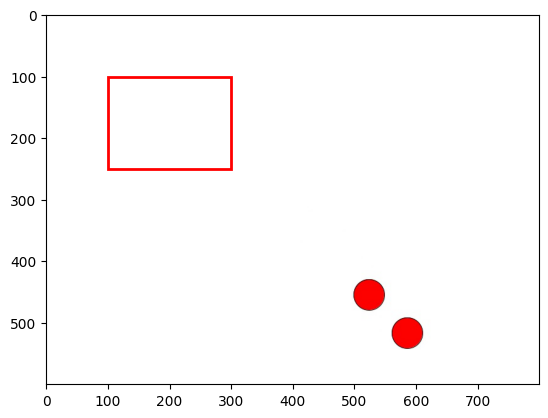

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the image
image_path = 'frame1.jpg'
image = Image.open(image_path)

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Define the bounding box coordinates
x_min = 100
y_min = 100
width = 200
height = 150

# Create a rectangle patch
rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
# Add the rectangle patch to the axes
ax.add_patch(rect)
# Show the plot
plt.show()

In [24]:
!wget https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/dummy%20data/labeling_circles/bounding_box_coordinates.csv

--2023-05-14 18:43:06--  https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/dummy%20data/labeling_circles/bounding_box_coordinates.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9314 (9.1K) [text/plain]
Saving to: ‘bounding_box_coordinates.csv.1’

bounding_box_coordi 100%[===================>]   9.10K  --.-KB/s    in 0s      

2023-05-14 18:43:06 (63.8 MB/s) - ‘bounding_box_coordinates.csv.1’ saved [9314/9314]



In [25]:
import csv

# Path to the CSV file
csv_path = 'bounding_box_coordinates.csv'

# Open the CSV file
with open(csv_path, 'r') as file:
    # Create a CSV reader
    reader = csv.reader(file)
    
    # Initialize an empty list to store the data
    data = []
    
    # Read and process each row
    for row in reader:
        # Convert row values to numbers and append to the data list
        row_numbers = [float(value) for value in row]
        data.append(row_numbers)

In [30]:
FRAME_N = 40

In [31]:
data[FRAME_N]

[621.0, 671.0, 548.0, 598.0, 539.0, 589.0, 480.0, 530.0]

In [32]:
def convert_coordinates(min_x, max_x, min_y, max_y):
    x_min = min_x
    y_min = min_y
    width = max_x - min_x
    height = max_y - min_y
    return x_min, y_min, width, height

def display_image_with_bounding_boxes(image_filename, bounding_boxes):
    # Load the image
    image = Image.open(image_filename)

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Add bounding boxes to the plot
    for bbox in bounding_boxes:
        print(bbox)
        x_min, y_min, width, height = convert_coordinates(*bbox)
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    # Show the plot
    plt.show()

[621.0, 671.0, 548.0, 598.0]
[539.0, 589.0, 480.0, 530.0]


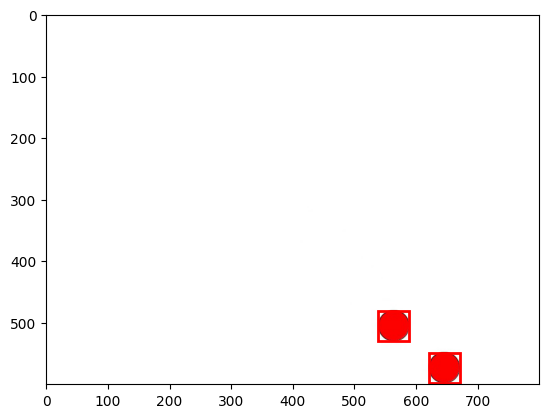

In [33]:
display_image_with_bounding_boxes(f'training_images/{FRAME_N}.jpg', [data[FRAME_N][:4], data[FRAME_N][4:]])

In [34]:
image = Image.open('/content/frame1.jpg')

In [36]:
image.size

(800, 600)

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Load and preprocess your dataset
# X_train: input images
# y_train: bounding box coordinates of the two objects
image_height=600
image_width=800
image_channels=3

# Define the model architecture
input_shape = (image_height, image_width, image_channels)
inputs = Input(shape=input_shape)
x = Conv2D(16, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output = Dense(8, activation='linear')(x)  # Output layer with 8 neurons for 2 bounding box coordinates

model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10)

# Save the trained model
model.save('object_detection_model.h5')